# Lab2: Customer Analysis Round 2

In [141]:
import pandas as pd
import numpy as np

In [142]:
data_mca=pd.read_csv('marketing_customer_analysis.csv')

In [143]:
data_mca.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [144]:
#1 Show the dataframe shape

In [145]:
print(data_mca.shape)

(10910, 26)


In [146]:
#2 Standardize header names

In [147]:
#use lower cases on all header names
col = []
for i in range(len(data_mca.columns)):
    col.append(data_mca.columns[i].lower())
data_mca.columns = col
data_mca

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [148]:
#for more standardization, I rename a column name to divide a word in two
data_mca=data_mca.rename(columns={'employmentstatus':'employment status'})
data_mca.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [149]:
#3. Which columns are numerical?

In [150]:
data_mca.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [151]:
data_mca.select_dtypes(np.number)

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [152]:
#numerical columns are: index, unnamed:0, customer lifetime value, income, monthly premium auto, months since the last claim, months since policy inception, number of open complaints, number of policies, total claim ammount
#--> seems ok

In [153]:
#4. Which columns are categorical?

In [154]:
data_mca.select_dtypes(object)

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [155]:
#numerical columns are: customer, state, response, coverage, eduation, effective to data, employment status, gender, location code, marital status, policy type, policy, renew offer typ, sales channel, vehicle class, vehicle size, vehicle type
# --> seems correct

In [156]:
#5. Check and deal with NaN values

In [157]:
data_mca.isna().sum()
# following columns seem problematic: state, response, months since last claim, number of open complaints, vehicle class, vehicle size, vehicle type
#vehicle type: 5482 NaN by 10910 rows --> column has to go
# the others have all 631,622 or 633 NaN --> could be a row problem?

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [158]:
#delete unhelpful column 'vehicle type'
data_mca = data_mca.drop(['vehicle type'], axis=1)
data_mca.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [159]:
#delete unhelpful column 'unnamed: 0':
data_mca = data_mca.drop(['unnamed: 0'], axis=1)
data_mca.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [160]:
    #filtering combinations of 2 columns with the same numbers of nan (pairs):
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())] #631 rows for pair1
#data_mca[(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())] #633 rows for pair2
#data_mca[(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())] #622 rows for pair3

    #filtering combinations of 2 pairs:
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())&(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())]
    #pair1 and 2: 42 rows
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())&(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())]
    #pair1 and 3: 31 rows
#data_mca[(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())&(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())]
    #pair2 and 3: 42 rows
    
#filtering all 6 nan-columns together:
#data_mca[(data_mca['state'].isna())&(data_mca['response'].isna())&(data_mca['months since last claim'].isna())&(data_mca['number of open complaints'].isna())&(data_mca['vehicle class'].isna())&(data_mca['vehicle size'].isna())]
#5 rows

In [161]:
#Decision against dropping single rows, because just 5 rows have a nan in 6 (out of 24) columns
#Instead, finding another way to deal with the nans in the 6 columns

In [162]:
#In order to clean the df some more (and hopefully some of the nan), I check for duplicates and remove if any

In [163]:
sum(data_mca.duplicated())
data_mca.drop_duplicates(inplace=True)
sum(data_mca.duplicated())
#56 duplicates deleted

0

In [164]:
data_mca.isna().sum()

customer                           0
state                            612
customer lifetime value            0
response                         612
coverage                           0
education                          0
effective to date                  0
employment status                  0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim          618
months since policy inception      0
number of open complaints        618
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    595
vehicle size                     595
dtype: int64

In [165]:
#dealing with state:
#data_mca[(data_mca['state'].isna())]
data_mca['state'].value_counts()

California    3540
Oregon        2895
Arizona       1933
Nevada         989
Washington     885
Name: state, dtype: int64

In [166]:
#use most common value "California" to fill na 
#--> Most answers by far California
#--> decision for fill in with the most common value:
data_mca['state'] = data_mca['state'].fillna('California')
data_mca['state'].value_counts()

California    4152
Oregon        2895
Arizona       1933
Nevada         989
Washington     885
Name: state, dtype: int64

In [167]:
#dealing with response:
# not sure if important that response is missing for further investigation
#--> fill na with 'no answer':
data_mca['response'] = data_mca['response'].fillna('no answer')
data_mca['response'].value_counts()

No           8782
Yes          1460
no answer     612
Name: response, dtype: int64

In [168]:
data_mca.head(50)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
5,HO81102,California,4745.181764,no answer,Basic,High School or Below,2/14/11,Employed,M,50549,...,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small


In [169]:
#dealing with months since last claim
#data_mca['months since last claim'].value_counts()
#--> very mixed answers, no common value --> makes sense to use here the mean or median

mean_monthssincelastclaim = data_mca['months since last claim'].mean()
mean_monthssincelastclaim
data_mca['months since last claim']=data_mca['months since last claim'].fillna(mean_monthssincelastclaim)

In [170]:
#dealing with number of open complaints 
#--> values: 0.0: 8128, 1.0: 1140, 2.0: 414...
#--> decision for fill in with the most common value:
data_mca['number of open complaints'] = data_mca['number of open complaints'].fillna('0.0')
data_mca['number of open complaints'].value_counts()

0.0    8128
1.0    1140
0.0     618
2.0     414
3.0     321
4.0     166
5.0      67
Name: number of open complaints, dtype: int64

In [171]:
#dealing with vehicle class
#--> values: Four-Door Car: 5197, Two-Door Car:2110
#--> decision for fill in with the most common value:
data_mca['vehicle class'] = data_mca['vehicle class'].fillna('Four-Door Car')
data_mca['vehicle class'].value_counts()

Four-Door Car    5792
Two-Door Car     2110
SUV              2009
Sports Car        548
Luxury SUV        207
Luxury Car        188
Name: vehicle class, dtype: int64

In [172]:
#dealing with vehicle size
#--> values: Medsize: 7229, Small:7229
data_mca['vehicle size'].value_counts()
#data_mca['vehicle size'] = data_mca['vehicle size'].fillna('Medsize')

Medsize    7229
Small      1962
Large      1068
Name: vehicle size, dtype: int64

In [173]:
# --> all nan gone

In [174]:
#6. Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , 
#ie. January, February and March. 
#Hint: If data from March does not exist, consider only January and February.

In [175]:
#Months extract from the column m'effective to date':
data_mca['effective to date'] = pd.to_datetime(data_mca['effective to date'], errors='coerce')
#file['date_time'][0].month
#data_mca['month'] = data_mca['effective to date'][0].month
data_mca['month'] = pd.DatetimeIndex(data_mca['effective to date']).month

In [178]:
data_mca.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [182]:
data_mca[data_mca['month']<4]
data_mca.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [ ]:
7.BONUS: Put all the previously mentioned data transformations into a function.

In [ ]:
#no time before midnight, sorry!

# Lab3: Customer Analysis Round 3

In [ ]:
#1: Show DataFrame info.

In [183]:
data_mca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10854 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10854 non-null  object        
 1   state                          10854 non-null  object        
 2   customer lifetime value        10854 non-null  float64       
 3   response                       10854 non-null  object        
 4   coverage                       10854 non-null  object        
 5   education                      10854 non-null  object        
 6   effective to date              10854 non-null  datetime64[ns]
 7   employment status              10854 non-null  object        
 8   gender                         10854 non-null  object        
 9   income                         10854 non-null  int64         
 10  location code                  10854 non-null  object        
 11  marital status 

In [ ]:
#2: Describe DataFrame.

In [184]:
data_mca.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of policies,total claim amount,month
count,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000,10854.000000
mean,8012.835553,37544.419385,93.212088,15.143806,48.101529,2.976875,434.851263,1.466925
std,6879.620144,30363.686322,34.450728,9.788910,27.927811,2.397886,292.005444,0.498928
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,1.000000,271.082527,1.000000
50%,5764.823237,33813.500000,83.000000,15.000000,48.000000,2.000000,383.403043,1.000000
75%,8992.779137,62275.500000,109.000000,23.000000,71.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,9.000000,2893.239678,2.000000


In [ ]:
#3: Show a plot of the total number of responses.

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

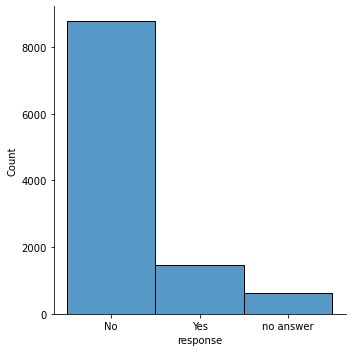

In [194]:
sns.displot(data_mca['response'], bins=100)
plt.show()
#Histogramm shows categorical data and count - how do I get total number though? 

In [ ]:
#4: Show a plot of the response rate by the sales channel.

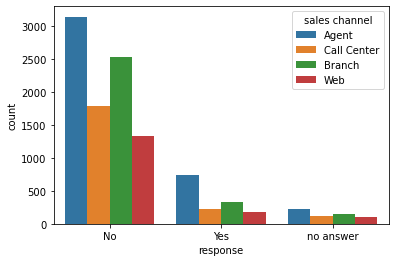

In [199]:
sns.countplot(data=data_mca, x='response',hue='sales channel')
plt.show()

In [ ]:
#5: Show a plot of the response rate by the total claim amount.

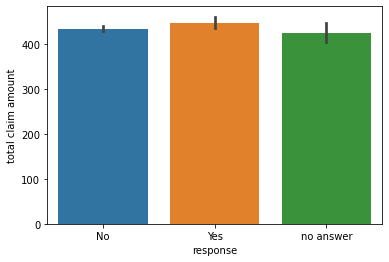

In [206]:
sns.barplot(x="response", y="total claim amount", data=data_mca)
plt.show()

In [ ]:
#6: Show a plot of the response rate by income.

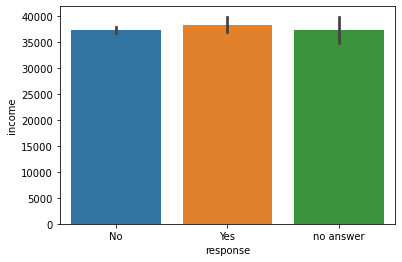

In [205]:
sns.barplot(x="response", y="income", data=data_mca)
plt.show()